# 과적합과 방지방법

## 1. Deep Neural Network에서의 Dataset

- Deep Neural Network에서 Dataset $\left( Z_{n \times n_{_0}}, y_{n \times 1} \right)$ 는 Population으로 부터의 $z \in R^{n_{_0}}$인 vector를 $n$개  Sampling 해서 얻은 Dataset임<br>
$ \ \ $ $\checkmark \ $ Population이란 관심의 대상의 전체 집합을 말함<br>


- Dataset $\left( Z_{n \times n_{_0}}, y_{n \times 1} \right)$은 학습을 하기 위한 Training Dataset $\left( Z_{Tr}, y_{Tr} \right)$과 학습된 Deep Neural Network Model의 성능을 확인하기 위한 Test Dataset $\left( Z_{Te}, y_{Te} \right)$으로 구분됨<br>
$ \ \ $ $\checkmark \ $ Training Dataset $\left( Z_{Tr}, y_{Tr} \right)$을 이용하여 Population을 잘 묘사하는 Model을 찾음<br>
$ \ \ $ $\checkmark \ $ Test Dataset $\left( Z_{Te}, y_{Te} \right)$을 이용하여 Population으로부터의 Sample에 대해서도 Label Data와 일치하는지를 확인함

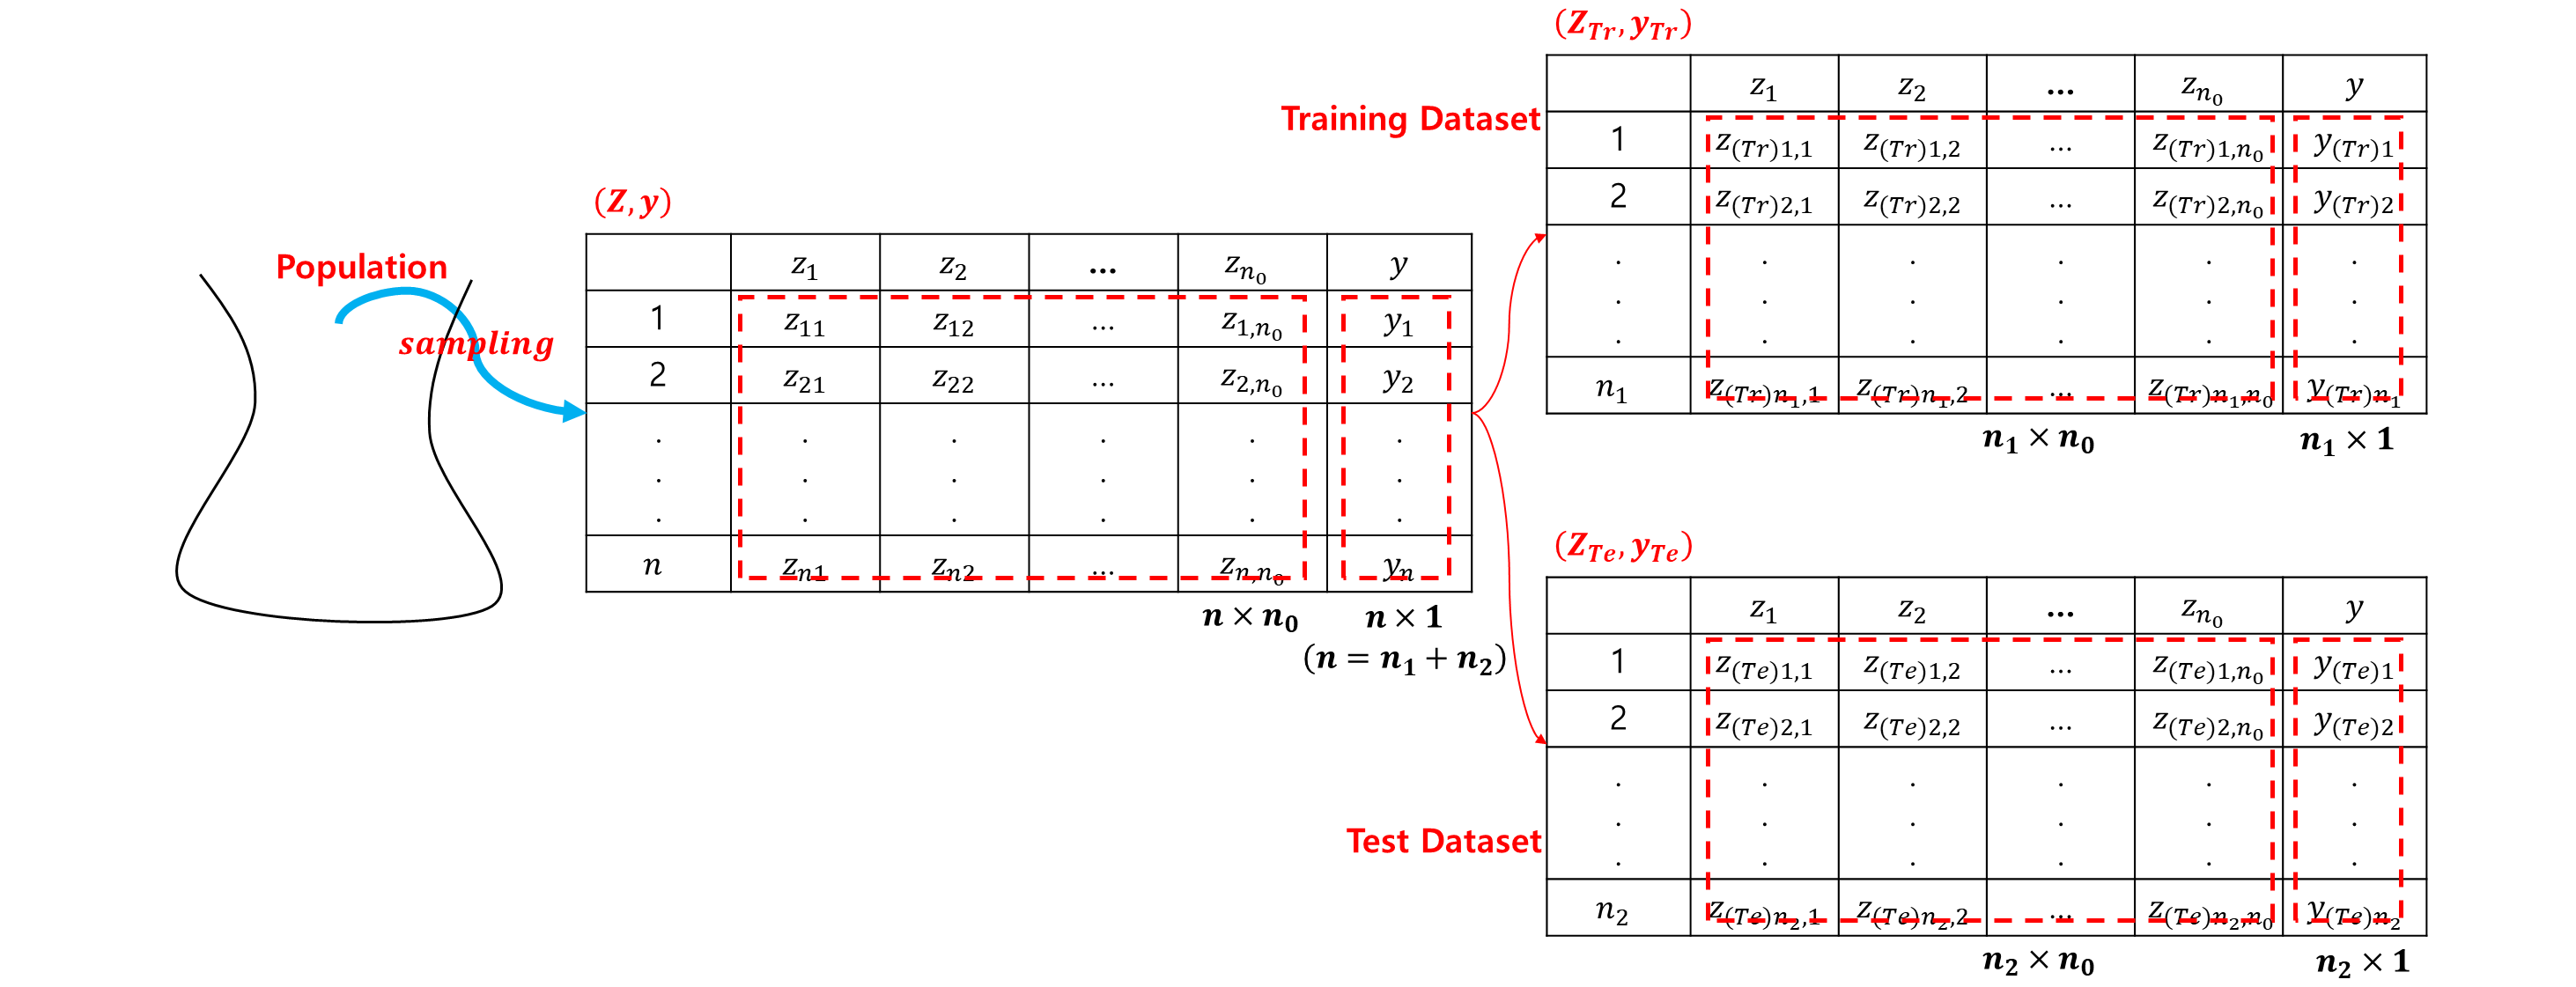

- 학습된 Deep Neural Network Model은 Population을 잘 설명하는 Model이어야함<br>
$ \ \ $ $\checkmark \ $ 즉, Model이 지도학습 Model이라면,  Population으로 부터의 vector $z = \left( z_1, ..., z_{n_{_0}} \right)$에 대해 label $y$를 <br> $\quad \ \ $ 잘 예측하는 Model이어야함

$ \qquad $ $\checkmark \ $ Training dataset $\left( Z_{Tr}, y_{Tr} \right)$을 이용하여 Model(Deep Neural Network)을 학습시킴<br>

$$
\hat y = \sigma^{(L)} \hat W^{(L)} \cdots  \sigma^{(2)} \hat W^{(2)}  \sigma^{(1)} \hat W^{(1)} \left( z^{(1)} \right)
$$

$ \qquad $ $\checkmark \ $ Test dataset $\left( Z_{Te}, y_{Te} \right)$을 이용하여 학습된 Model의 Prediction 능력, 즉 $Loss \left( \hat y, y \right)$을 평가함

$$
Loss(W)=
\begin{cases} 
MSE \left( y, \hat y \right) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i  - \hat y_i\right)^2, &       if \ y \ contimuous  \\\\
CrossEntropy \left( p, q \right) = E_{p} \left[ log \left( \frac{1}{q} \right) \right],          &       if \ y \ discrete
\end{cases}
$$

$\qquad \quad $ $\cdots$ $p$는 Label $y$의 확률분포이고  $q$는 Deep Neural Network를 통해 근사화한  $\hat y$의 확률분포임<br>
$\qquad \quad $ $\cdots$ $W = \left( W^{(1)}, W^{(2)}, ..., W^{(L)}, \right)$이고 $W^{(l)}$은 $l^{th}$ Hidden Layer에 포함된 모든 $w_{i, j}^{(l)}$ Parameter임

## 2. Underfitting과 Overfitting

### 2.1 Underfitting과 Overfitting의 징후

- Training Dataset $ \left( Z_{Tr}, y_{Tr} \right)$로 Neural Network을 학습시켜보면 다음과 같은 경우가 발생함

Fitting | $\quad$ | $\qquad \qquad$ 설명
:----:|:----|:----
<br> Underfitting | | <br> $\bullet \ $ 학습 Epoch의 부족으로 Gradient Descent를 이용한 iteration에서 $ \frac{\partial Loss(W)}{\partial w_{ij}^{(l)} } = 0 $에 <br> $ \ \ $ 도달하기 전에 epoch가 중단된 상태 <br><br> $ \ \ $ $\checkmark \ $ Loss의 최소값을 구할 때 iteration수(Epoch) 수가 부족한 상태 <br> $ \ \ $ $\checkmark \ $ 학습된  $W$ parameter가  Training Dataset의 특성을 반영하지 못한 상태(충분히 학습되지 않은 상태)<br> 
<br> Overfitting | | <br> $\bullet \ $ 학습된 $W$ parameter가 Population이 아닌 Training Dataset의 Pattern을 과도하게 반영한 상태 <br> $ \ \ $ $\checkmark \ $ Test dataset에 대한 Prediction Loss 가 최소값이 아닌 상태  <br> $ \ \ $ $\checkmark \ $ Training의 결과가 Population을 왜곡한 상태

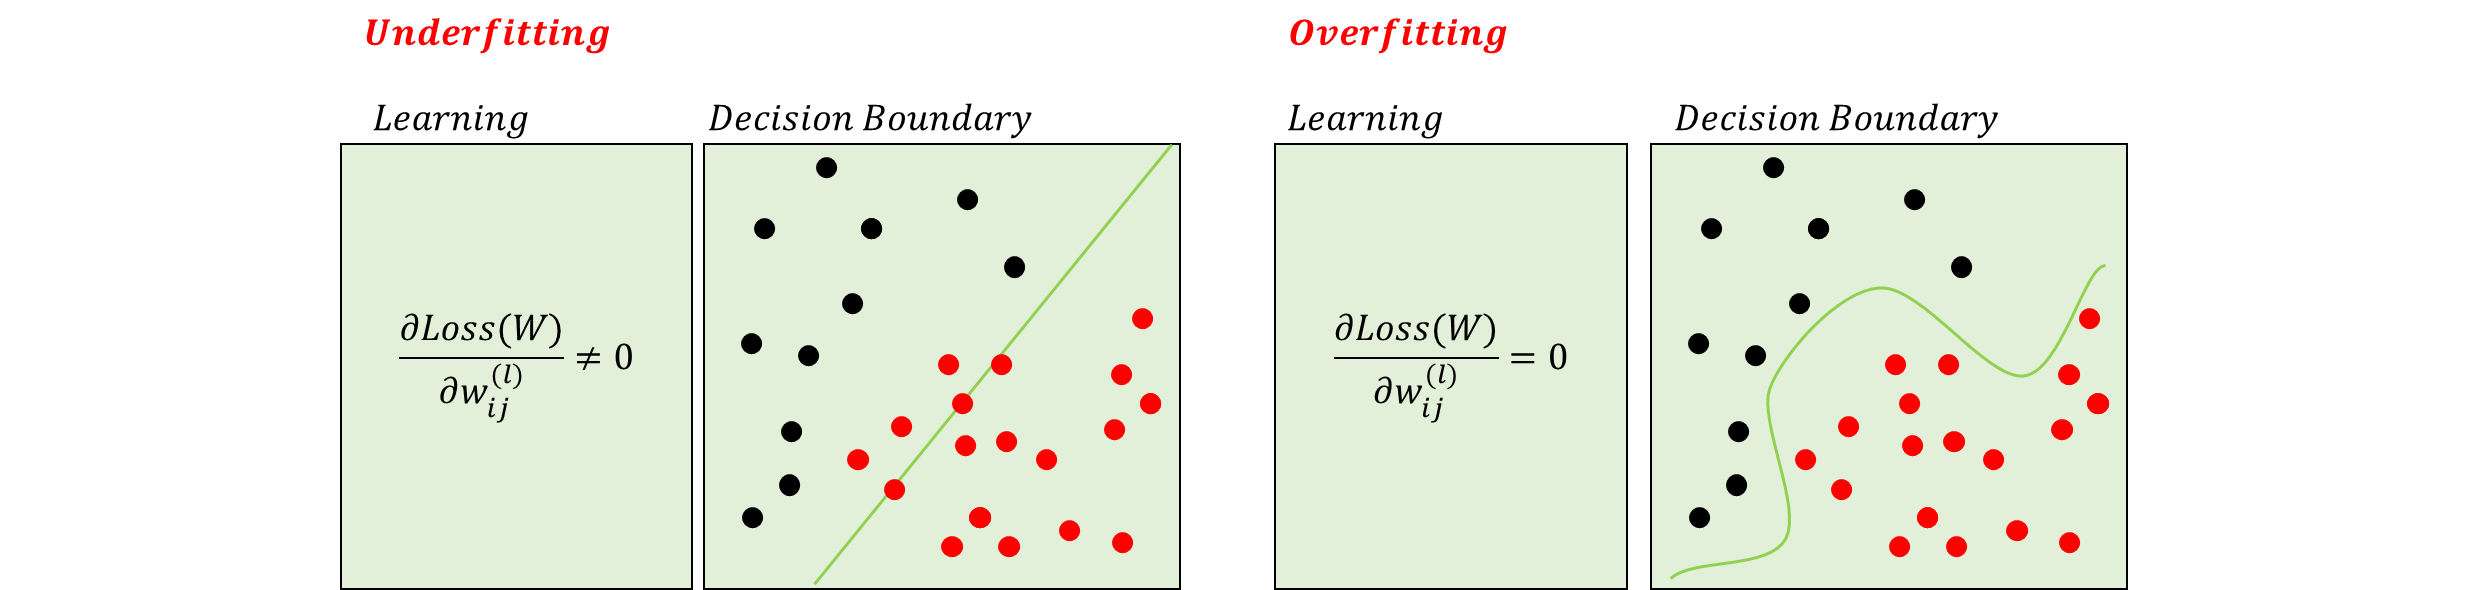

$\qquad$ $\Longrightarrow \ $ 그렇다면 Traing Dataset을 이용한 학습과정에서 과적합을 어떻게 탐지할 것인가? 

### 2.2 Training Dataset을 이용한 학습과 Underfitting과 Overfitting

- Training dataset을 이용한 학습과정에서 학습을 지속함에 따라 다음과 같은 현상을 관찰할 수 있음<br>
$ \ \ $ $\checkmark \ $ $Training \ Loss$는 학습이 진행함에 따라 지속적으로 감소하여 parameter가 $W_{n_3}$일 때 최소 Loss를 가지게 됨<br>
$\quad$ $\cdots$ $W_i$는 epoch가 $i$번 진행되었을 때 Deep Neural Network의 학습된 parameter값을 의미함

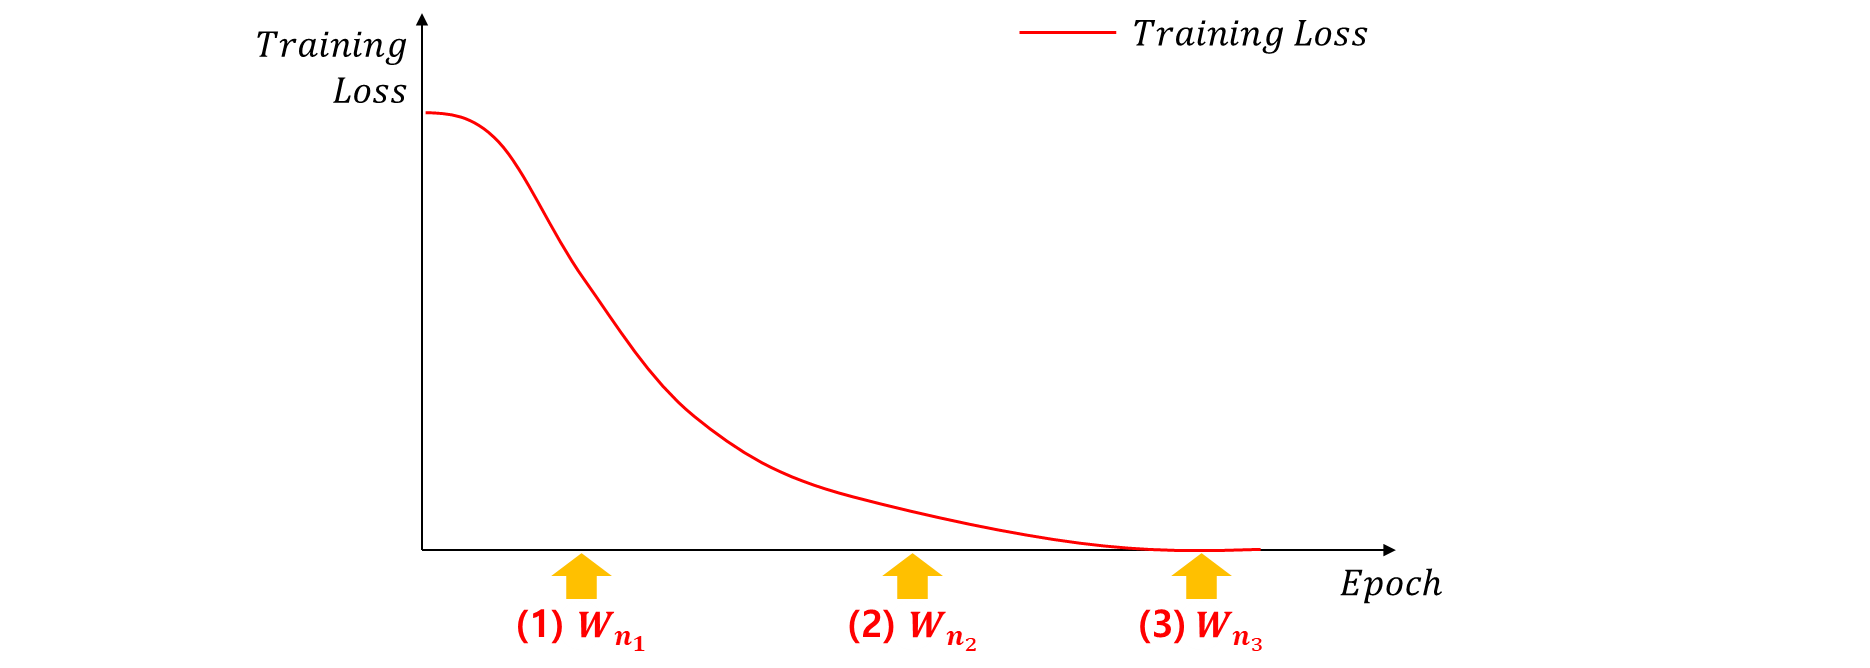

- 학습이 진행되는 정도에 따른 $W$와 Decision Boundary를 보면 다음과 같음<br>
$ \ \ $ $\checkmark \ $ 학습이 진행됨에 따라 Decision Boundary가 Training Dataset을 잘 구분하고 있는 것을 확인할 수 있음<br>

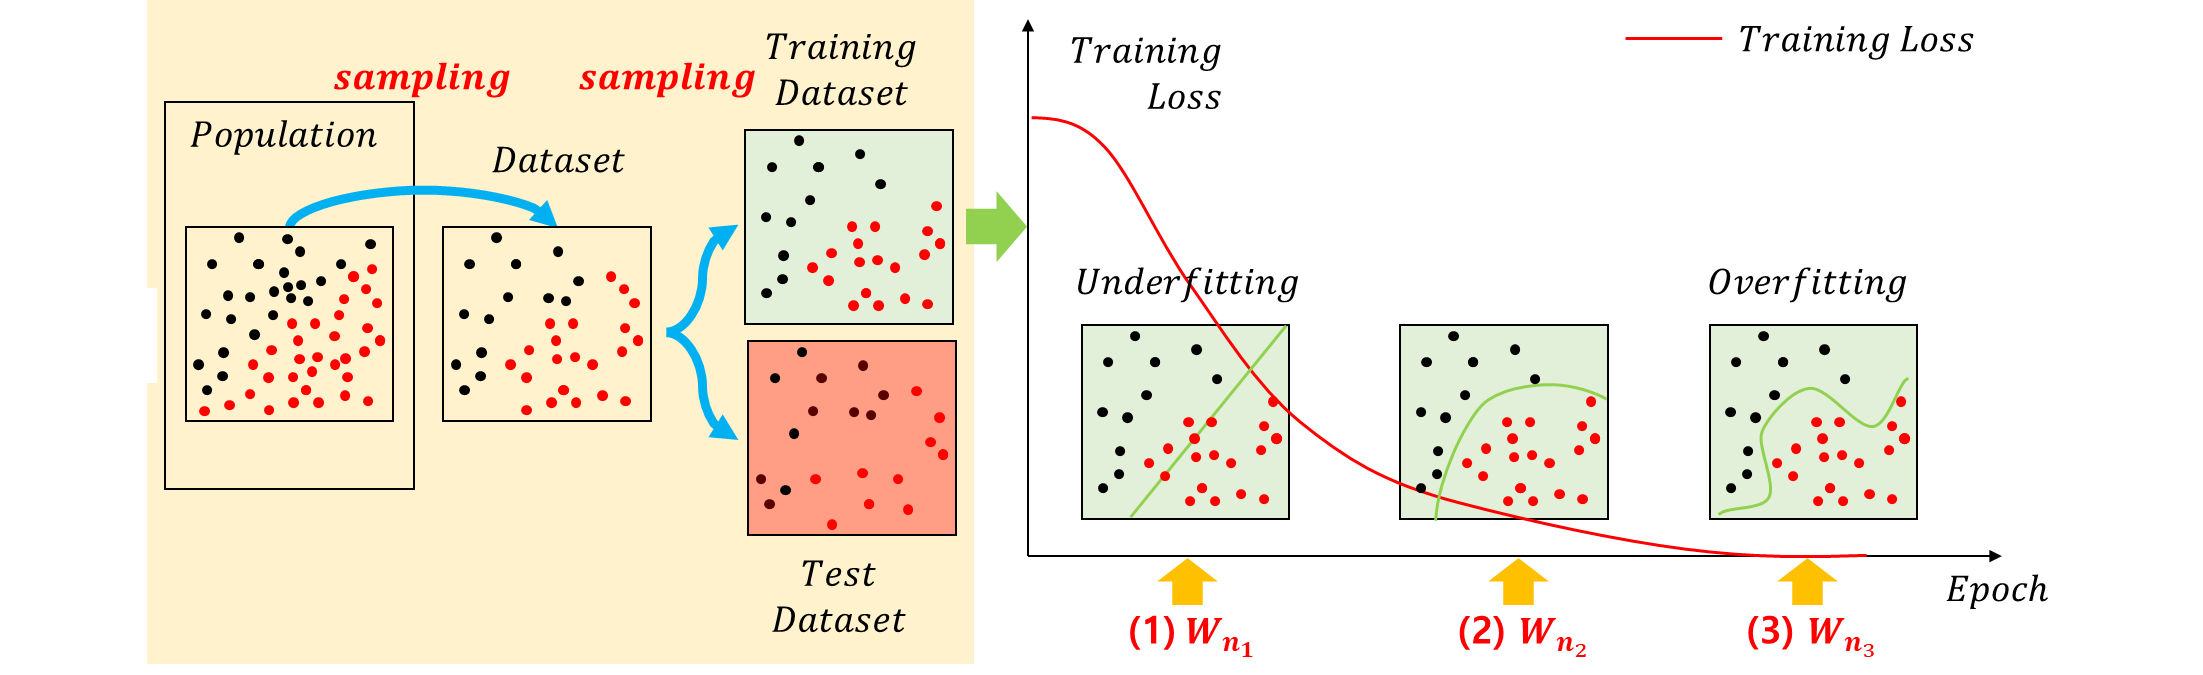

- 그렇다면 Training Loss가 가장 작은  $W_{n_3}$ parameter를 사용하는 것이 적절할까?<br>

- **학습의 목적**은 <br> 
>(1) Sample인  <span style="color:red">Training Dataset을 이용</span>하여 <br>
(2) <span style="color:red">Population(모집단)</span>을 잘 설명하는 <br>
(3) <span style="color:red">Model</span>을 얻는 것임

$ \qquad $ $\Longrightarrow \ $ <span style="color:blue">Training Dataset의 특성을 반영</span>하는 것이 목적이 아님

### 2.3 Test Dataset을 이용한 Prediction과 Loss

- 모집단의 특성을 잘 반영하는 Model이란 어떤 Model을 말할까?<br>
$ \ \ $ $\checkmark \ $ Population으로 부터 Sample을 뽑아 Model에 적용하였을 때 Population의 특성을 잘 반영하는 것을 의미함 <br>
$ \quad $ (1) 우리가 가진 Test Dataset은 Population으로 부터 추출한 Sample이고<br>
$ \quad $ (2) Training Dataset을 이용하야 개발한 Model이 잘 Prediction한다는 의미임 <br>


- 즉, Test Dataset의 Prediction이 잘되는 Model을 말함<br>
$ \ \ $ $\checkmark \ $ Loss function은 Model을 이용하여 Approximation한 값 $\hat y$와 Label $y$의 차이를 Measure하도록 만든 함수임

- 과도한 Training Dataset의 학습은 Population의 특성을 잃고, Population의 한 Sample인 Training Dataset의 특성을 학습하게 됨<br>   
$ \ \ $ $\checkmark \ $ 학습된 Model에 Test Dataset을 이용하여 $Test \ Loss$를 계산해 보면 학습정도에 따라 $Test \ Loss$가 감소하다 <br> $\quad \ \ \ $ 증가하는 현상을 관찰 할 수 있음

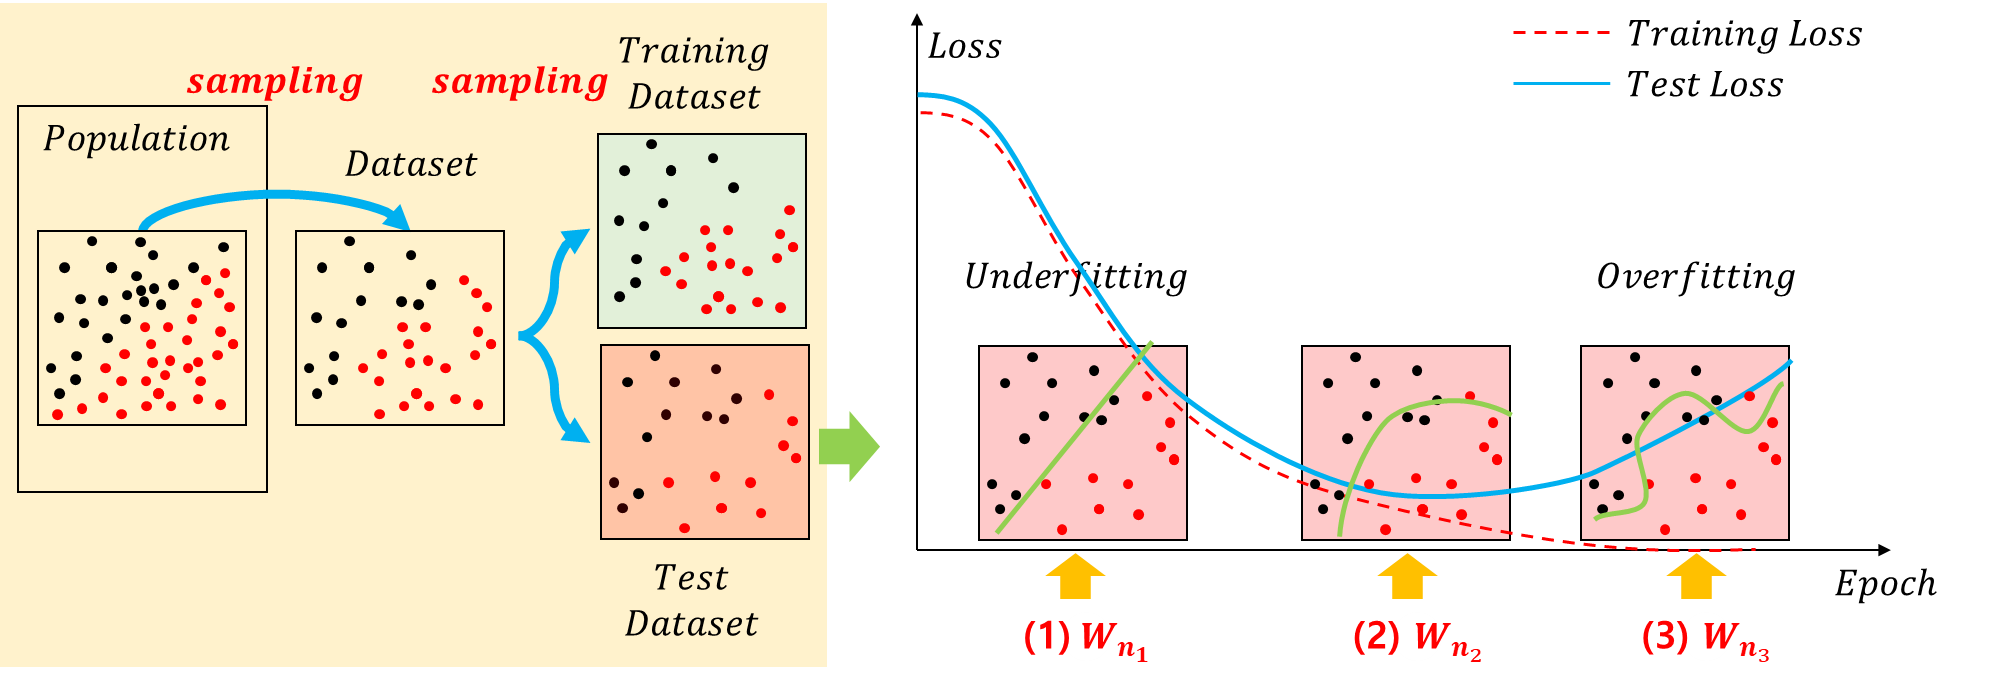

$\qquad$ $\checkmark \ $ Prediction Loss가 가장 적은 $W$는 $W_{n_3}$가 아닌 $W_{n_2}$ 근처 임을 알 수 있음

## 3. 지도학습의 과적합 방지 방법들

### 3.1 Validation Dataset을 이용한 과적합 방지

- Training Dataset을 Training Dataset2와 Validation Dataset으로 분할하여 Training Datase2를 이용하여 학습하는 동안 Validation Dataset을 이용하여 학습에 사용하지 않은 Validation Dataset의 Validation Loss가 증가하는 epoch에서 학습을 중단함으로써 과적함을 방지는 방법

Dataset |   설명
:----:|:----
$$ \left( Z, \ y \right) $$ | $\bullet \ $ Deep Neural Network 학습을 위해 사용되는 전체 Dataset <br> $ \ \ $ $\checkmark \ $ $Z$는 $n \times n_{_0}$ 행렬 <br> $ \ \ $ $\checkmark \ $ $y$는 $n \times 1$ vector <br> $ \ \ $ $\checkmark \ $ $n$ $=$ $n_1$ $+$ $n_2$
$$ \left( Z_{Tr}, \ y_{Tr} \right) $$ | $\bullet \ $ Training Dataset으로 Deep Neural Network을 학습하는데 사용하는 Dataset <br> $ \ \ $ $\checkmark \ $  경우에 따라 2개의 Dataset으로 Split하여 사용할 수 있음 <br> $ \ \ $ $\checkmark \ $ $Z_{Tr}$은 $ n_1$ $\times$ $ n_{_0}$ 행렬 <br> $ \ \ $ $\checkmark \ $ $y_{Tr}$는 $n_1 \times 1$ vector  <br> $ \ \ $ $\checkmark \ $ $n_1$ $=$ $n_{11}$ $+$ $n_{12}$
$$ \left( Z_{Te}, \ y_{Te} \right) $$ | $\bullet \ $ Test Dataset으로 Deep Neural Network의 Prediction 성능을 측정하기 위한 <br> $ \ \ $ Dataset <br> $ \ \ $ $\checkmark \ $ $Z_{Te}$는 $ n_2$ $\times$ $ n_{_0}$ 행렬 <br> $ \ \ $ $\checkmark \ $ $y_{Te}$는 $n_2 \times 1$ vector
$$ \left( Z_{T}, \ y_{T} \right) $$ | $\bullet \ $ Training Dataset을 2개로 split한 첫번째 dataset으로 Deep Neural Network  <br> $ \ \ $ 학습에 사용하는 Dataset <br> $ \ \ $ $\checkmark \ $ $Z_{T}$는 $ n_{11}$ $\times$ $ n_{_0}$ 행렬 <br> $ \ \ $ $\checkmark \ $ $y_{T}$는 $n_{11} \times 1$ vector
$$ \left( Z_{V}, \ y_{V} \right) $$ | $\bullet \ $ Training Dataset을 2개로 split한 두번째 dataset으로 Deep Neural Network이  <br> $ \ \ $  과적합되는지 판단하는데 사용하는 Dataset <br> $ \ \ $ $\checkmark \ $ $Z_{V}$는 $ n_{12}$ $\times$ $ n_{_0}$ 행렬 <br> $ \ \ $ $\checkmark \ $ $y_{T}$는 $n_{12} \times 1$ vector

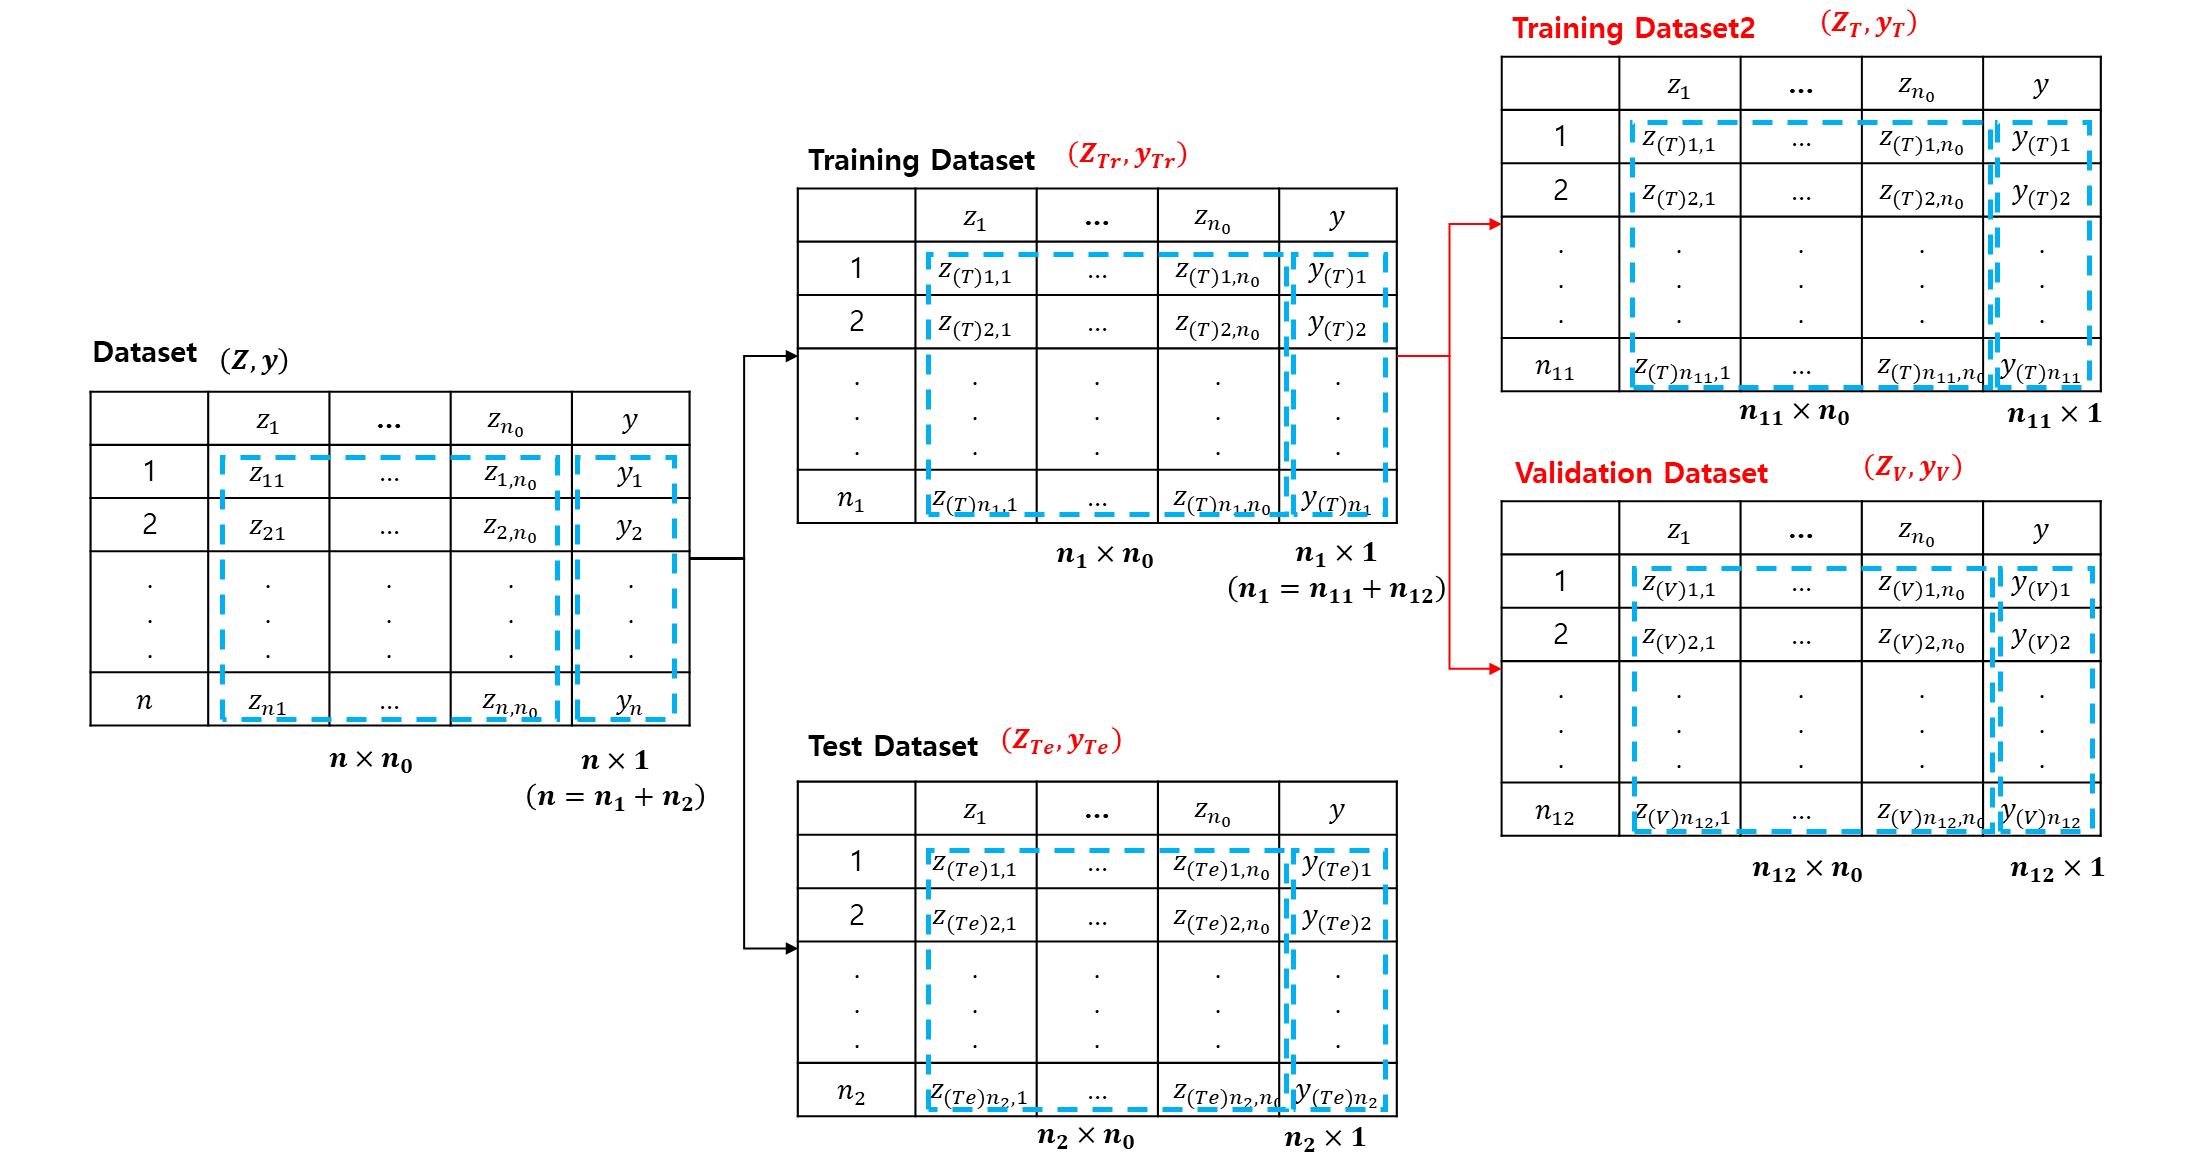

- Training Dataset2를 이용하여 학습하는 과정 중에 Validation Dataset을 이용하여 Validation Loss가 증가하면 학습을 중단하는 방법으로 과적합을 방지함

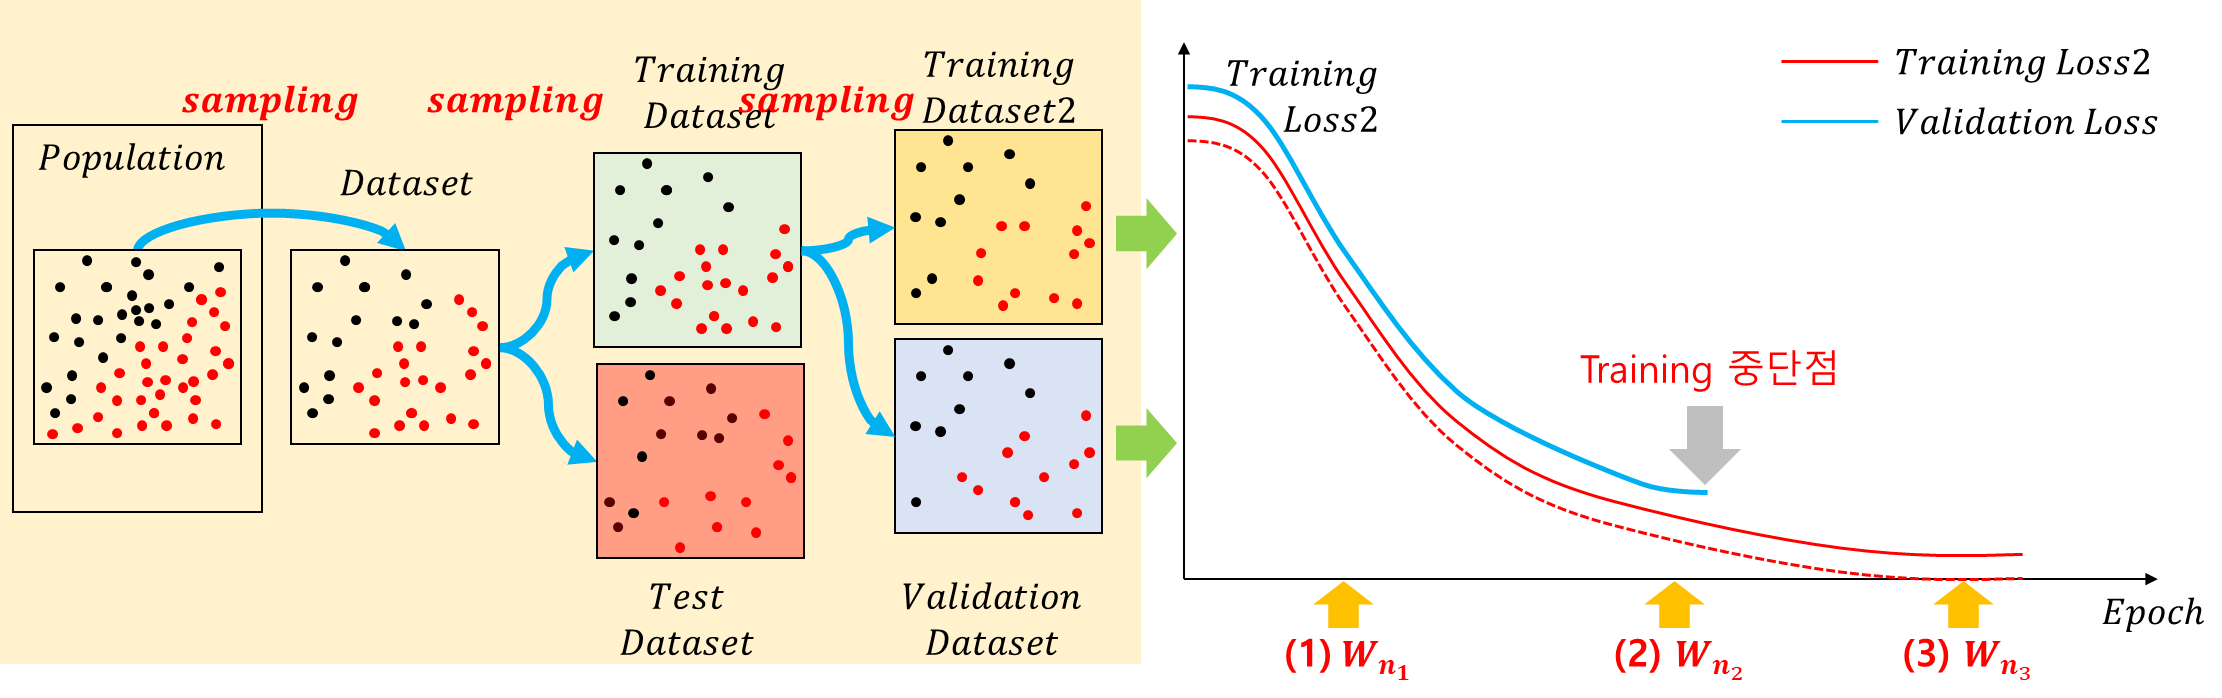

### 3.2 Data양을 늘리기


#### (1) 추가 sample data를 쉽게 구할 수 있을 때

- Data의 수가 적을 때, data의 과적합이 쉽게 발생할 수 있음
- Data의 수를 증가시킴으로써 과적합을 방지할 수 있음

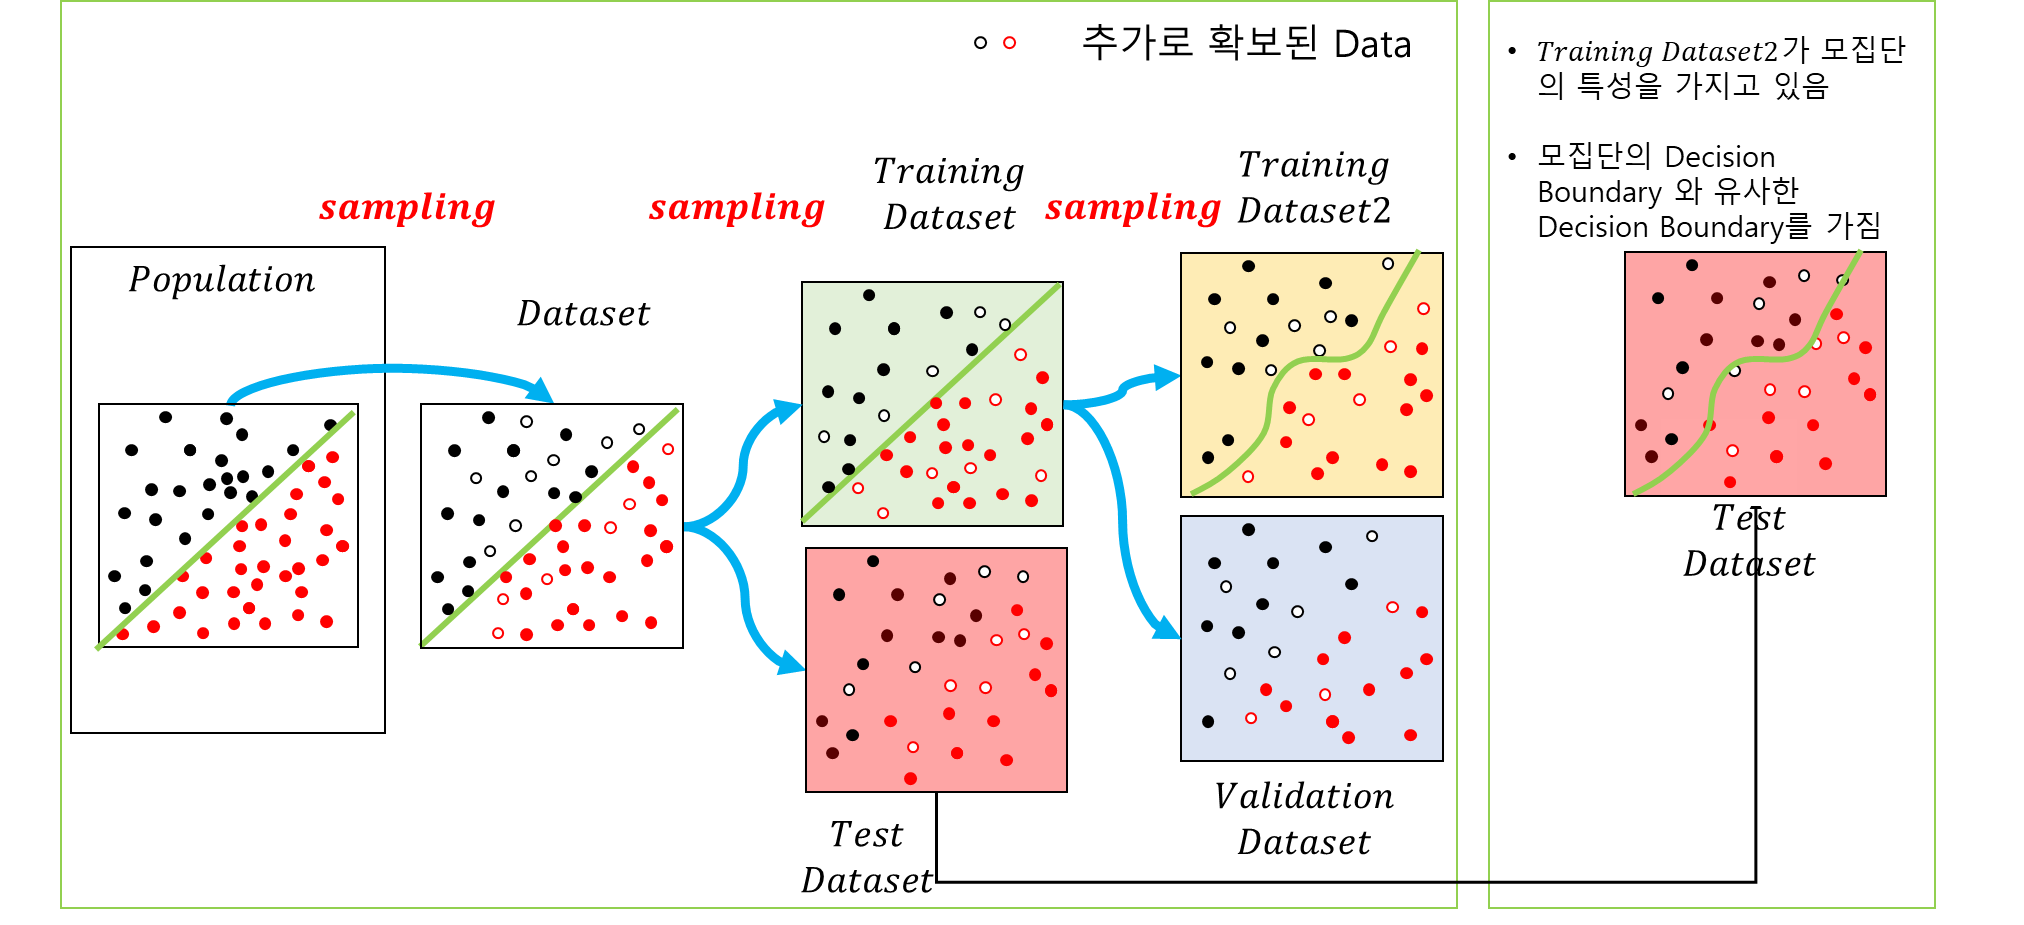

#### (2) 추가 Sample Data를 구할 수 없을 때

- Data Augmentation
- Data 합성등을 통해 data를 확보할 수 있음


- Keras Library가 제공하는 Data Augmentation함수를 사용할 수 있음<br>


>from keras.preprocessing.image import ImageDataGenerator
>
>aug_data = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
>
>aug_data.fit(train_data)

### 3.3 Deep Neural Network 복잡도 줄이기

- Deep Neural Network Architecture를 결정하는 것은 Hyperparameter 수입

Architecture | Hyperparameter
:----:|:----
<br> 표준 Model | <br>  $\bullet \ $ $L := $ Hidden layer 수  <br> $\bullet \ $ $n_l :=$ $l^{th}$ layer noder 수
<br> 간략한 Model | <br> $\bullet \ $ $L' := $ Hidden layer 수  $\left( L' \le L \right)$ <br> $\bullet \ $ $n_l' :=$ $l^{th}$ layer noder 수  $ \left( n_l' \le n_l \right) $

### 3.4 Regularization

#### (1) 규제가 있는 Optimization Model
- $L_1, L_2$ 규제가 있는 Deep Neural Network 문제는 다음과 같이 표현할 수 있음<br>
$ \ \ $ $\checkmark \ $ Loss function $Loss(W)$는 Classification 문제 또는 Regression 문제에 따라 다르게 정의 됨

$$
\begin{align} 
(Original \ Problem) \qquad & \underset{W}{minimize} \ \ Loss \left( W \right)   \\
& subject \ to \quad \hat y = \sigma^{(L)} \hat W^{(L)} \cdots \sigma^{(1)} \hat W^{(1)} \left( z^{(1)} \right)    \\\\\\
(L_2 \  Regulrization \ Problem \ 1) \qquad & \underset{W}{minimize} \ \ Loss \left( W \right)     \\
& subject \ to \quad \hat y = \sigma^{(L)} \hat W^{(L)} \cdots \sigma^{(1)} \hat W^{(1)}\left( z^{(1)} \right)   \\
& \qquad \qquad \sum_{i, j, l} \left\| w_{ij}^{(l)} \right\|^2 < \tau   \\\\\\
(L_1 \  Regulrization \ Problem \ 2) \qquad & \underset{W}{minimize} \ \ Loss \left( W \right)     \\
& subject \ to \quad \hat y = \sigma^{(L)} \hat W^{(L)} \cdots \sigma^{(1)} \hat W^{(1)}\left( z^{(1)} \right)    \\
& \qquad \qquad \sum_{i, j, l} \left| w_{ij}^{(l)} \right| < \tau   
\end{align}
$$

- 제약식이 없는 문제로 바꾸면 다음과 같음

$$
\begin{align} 
(Original \ Problem) \quad & \underset{W}{minimize} \ \ Loss \left( y,  \underbrace{ \sigma^{(L)} \hat W^{(L)} \cdots \sigma^{(1)}\hat W^{(1)} \left( z^{(1)} \right) }_{= \hat y } \right)     \\\\\\
(L_2 \  Regulrization \ Problem \ 1) \qquad & \underset{W}{minimize} \ \  Loss \left( y, \sigma^{(L)} \hat W^{(L)} \cdots \sigma^{(1)} \hat W^{(1)}\left( z^{(1)} \right) \right) + \lambda \sum_{i, j, l} \left\| w_{ij}^{(l)} \right\|^2  \\
& subject \ to \quad \lambda \ge 0       \\\\\\
(L_1 \  Regulrization \ Problem \ 2) \qquad & \underset{W}{minimize} \ \ Loss \left( y, \sigma^{(L)} \hat W^{(L)} \cdots \sigma^{(1)} \hat W^{(1)}\left( z^{(1)} \right) \right) + \lambda \sum_{i, j, l} \left| w_{ij}^{(l)} \right|    \\
& subject \ to \quad \lambda \ge 0
\end{align}
$$

#### (2) Gradient의 변화

- $L_1$규제의 경우 미분가능하지 않으므로 $L_2$규제에 대해 생각해 보자

- 문제에 따른 Gradient 값의 차이

$\qquad \qquad $ $
\begin{align}
(Original \  Problem) \quad w_{ij}^{(l)} =& w_{ij}^{(l)} \ - \  \rho \frac{\partial Loss \left( y, \hat y \right) }{\partial w_{ij}^{(l)}}  \\\\
(L_2 \  Regulrization \ Problem \ 1) \quad w_{ij}^{(l)} =& w_{ij}^{(l)} \ - \  \rho \left( \frac{ \partial  Loss \left( y, \hat y \right) }{\partial w_{ij}^{(l)}} + 2 \lambda \sum_{i, j, l} \| w_{ij}^{(l)} \| \right)
\end{align}
$

- $\lambda \ge 0$이고 $\| w_{ij}^{(l)} \| \ge 0$이므로 

$$
\frac{\partial Loss \left( y, \hat y \right) }{\partial w_{ij}^{(l)}} \le  
\frac{ \partial  Loss \left( y, \hat y \right) }{\partial w_{ij}^{(l)}} + 2 \lambda \sum_{i, j, l} \| w_{ij}^{(l)} \| 
$$

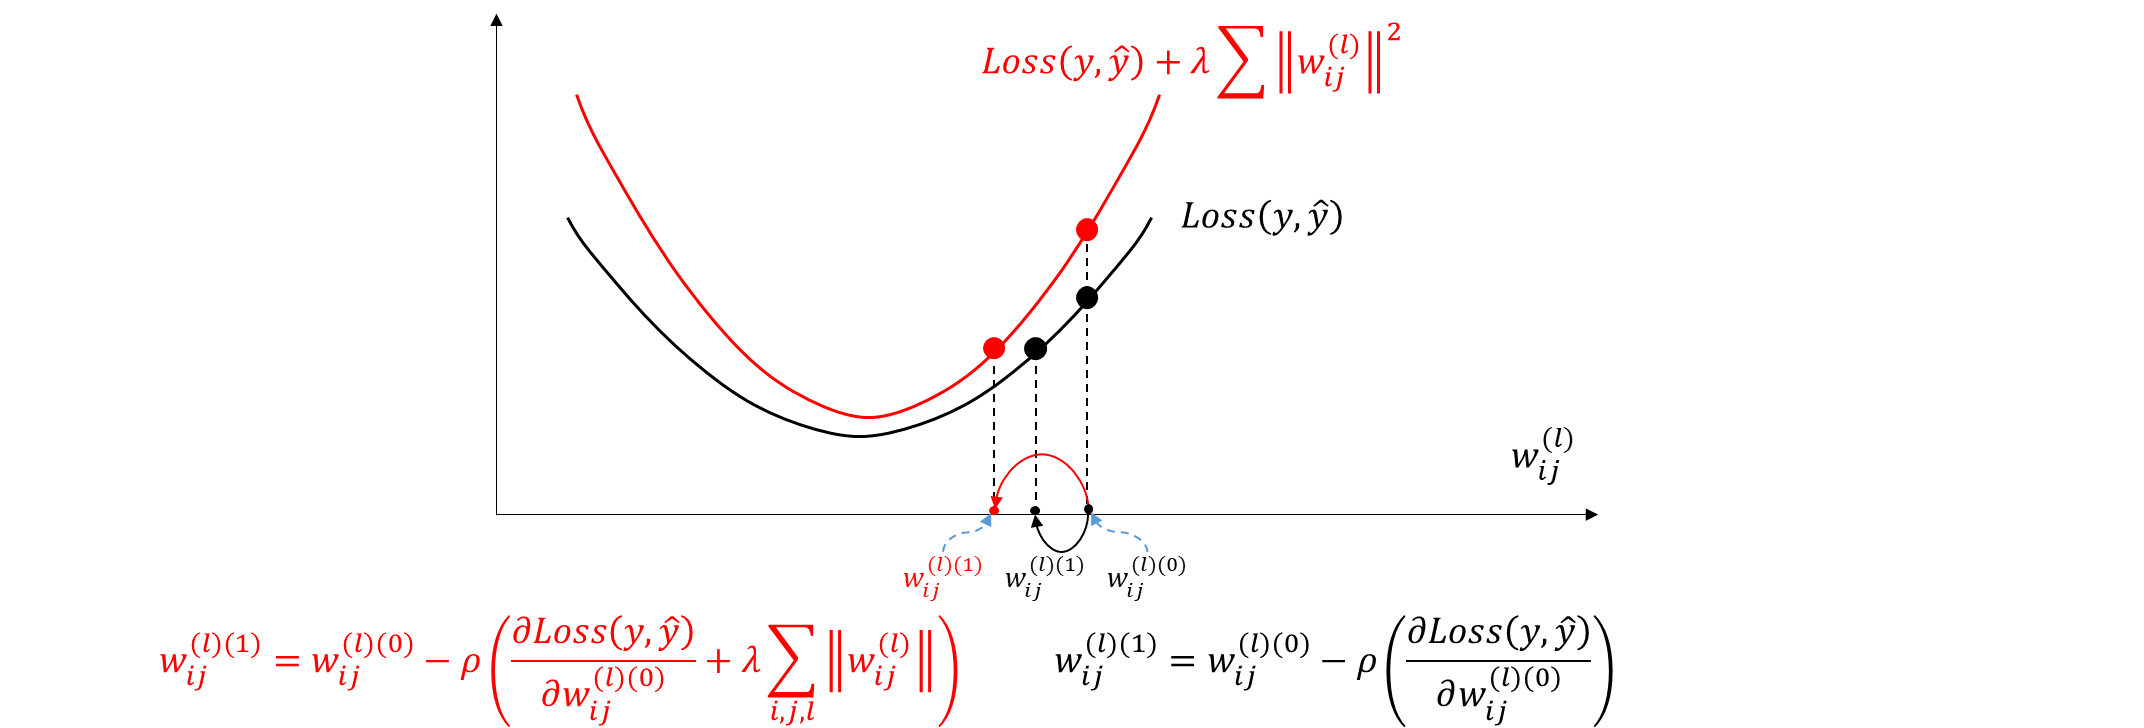

- 규제 $\sum_{i,j,l} \| w_{ij}^{(l)} \|^2 \le \tau$ 를 사용하면 minimization 최적화 문제를 풀었을 때, 가중치 $w_{ij}^{(l)}$ 가 0이 된다는 보장은 없지만  $\sum_{i,j,l} \| w_{ij}^{(l)} \| \ \rightarrow \ 0$이 되면서 각 $ \| w_{ij}^{(l)} \|  \ \rightarrow \ 0$가 됨 <br>
$ \ \ $ $\checkmark \ $ $ \| w_{ij}^{(l)} \|  \ \rightarrow \ 0$가 됨에 따라 node $y_{j}^{(l)}$이 $Loss \left( y, \hat y \right)$에 미치는 영향이 작아짐 <br>
$ \ \ $ $\checkmark \ $ Deep Neural Network을 단순화시키는 효과가 있음

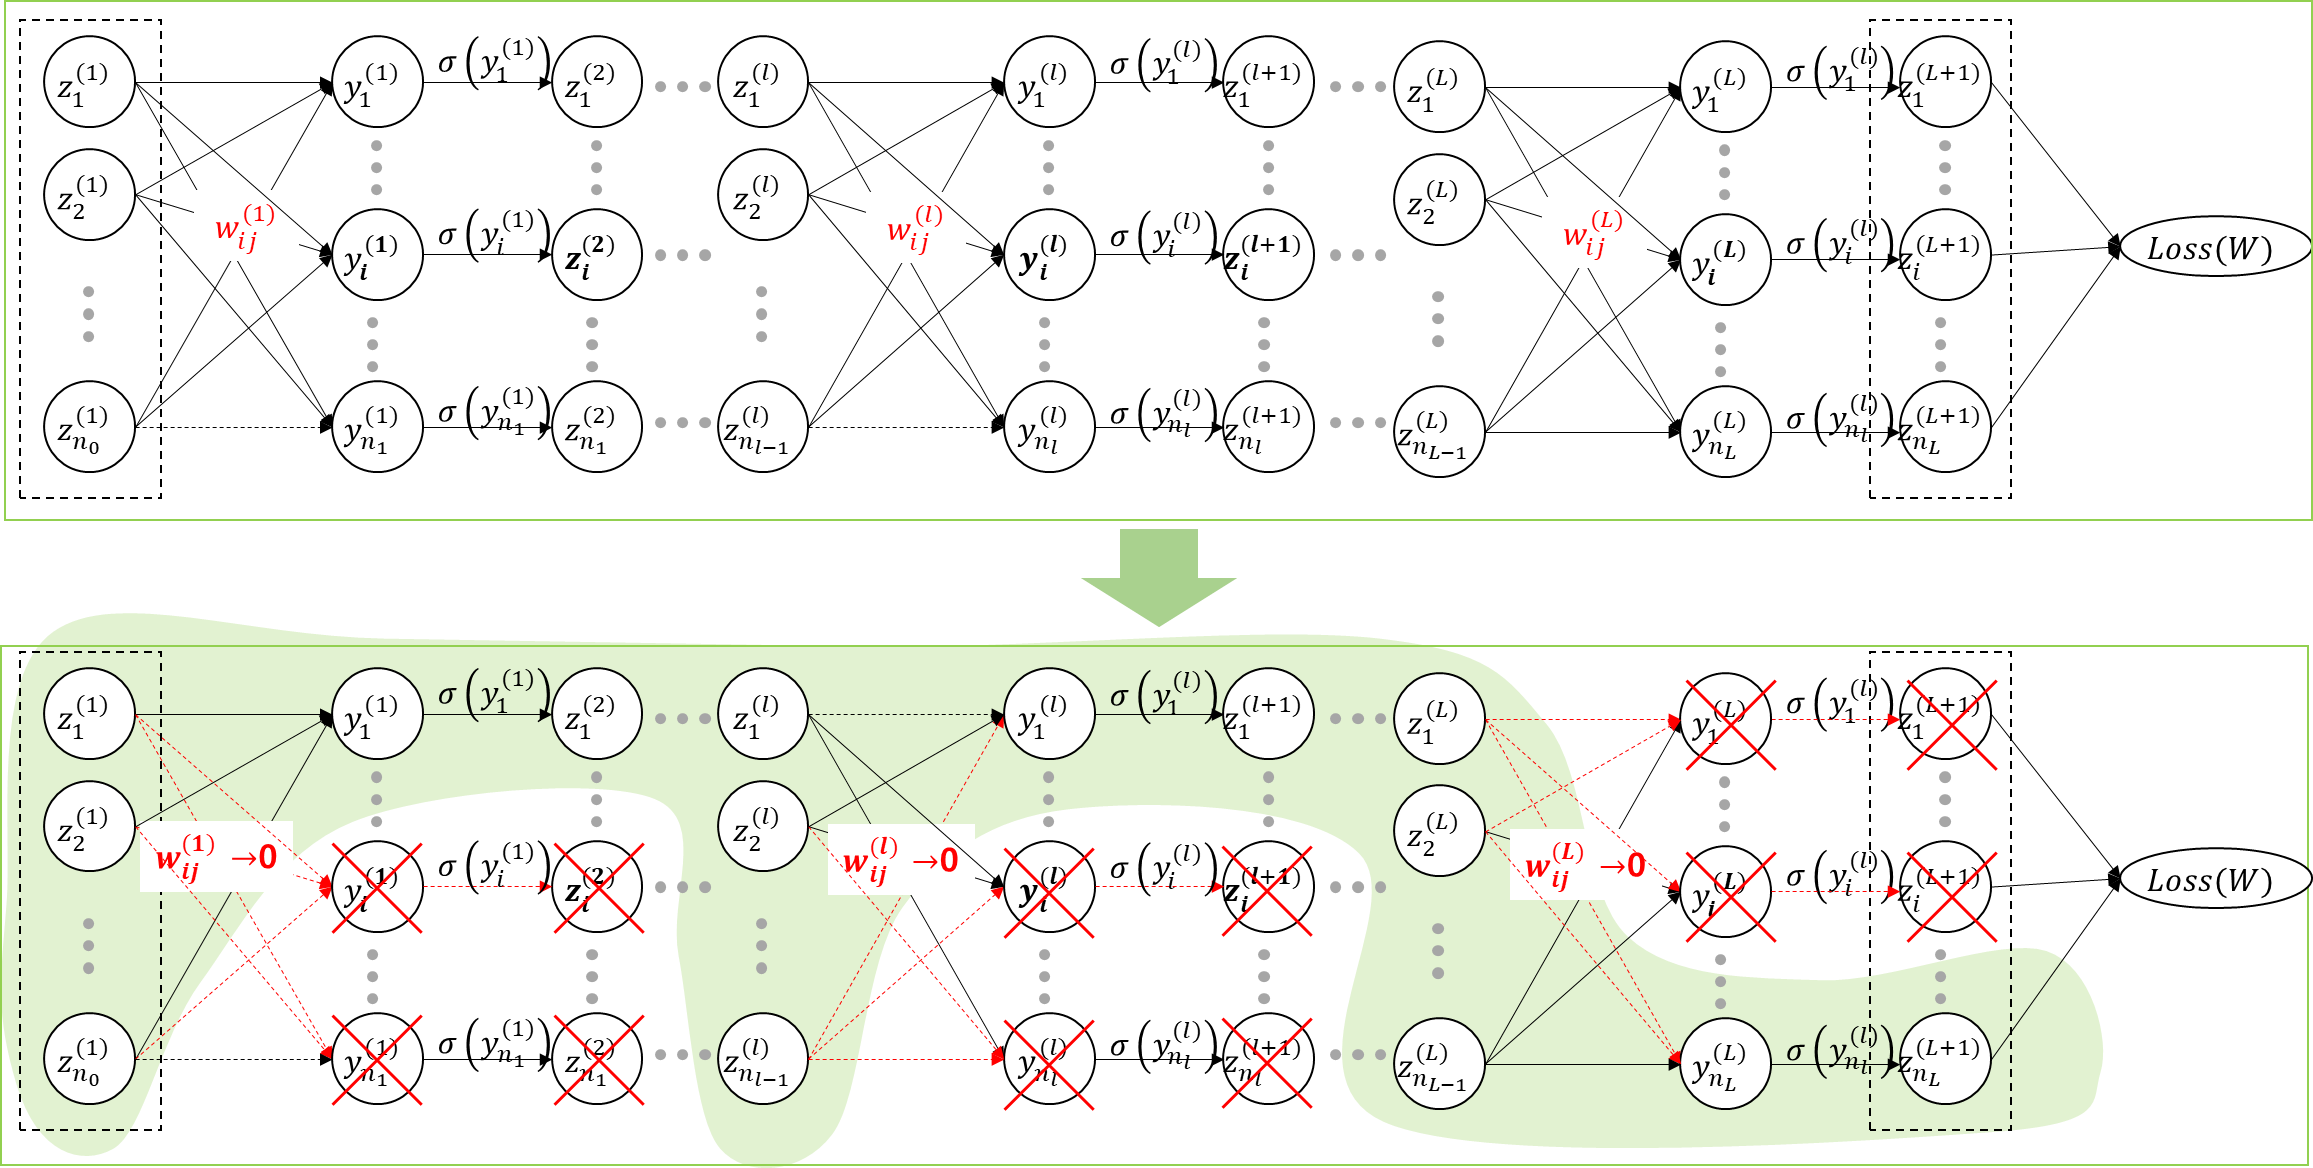

### 3.5 Dropout

- Dropout은 학습과정에서 Deep Neural Network의 <span style="color:red">일부 node를 사용하지 않는 방법</span>임<br>
$ \ \ $ $\checkmark \ $ Dropout할 node의 비율 $\alpha$를 정하여 node 값을 0으로 강제화하는 방법


- Ensemble 방법으로 사용하여 기본 Deep Neural Network node의 일정 비율 $\alpha$를 random하게 0으로 강제화한 $k$개의 Dropout Model을 이용하여 Deep Neural Network Model을 학습함

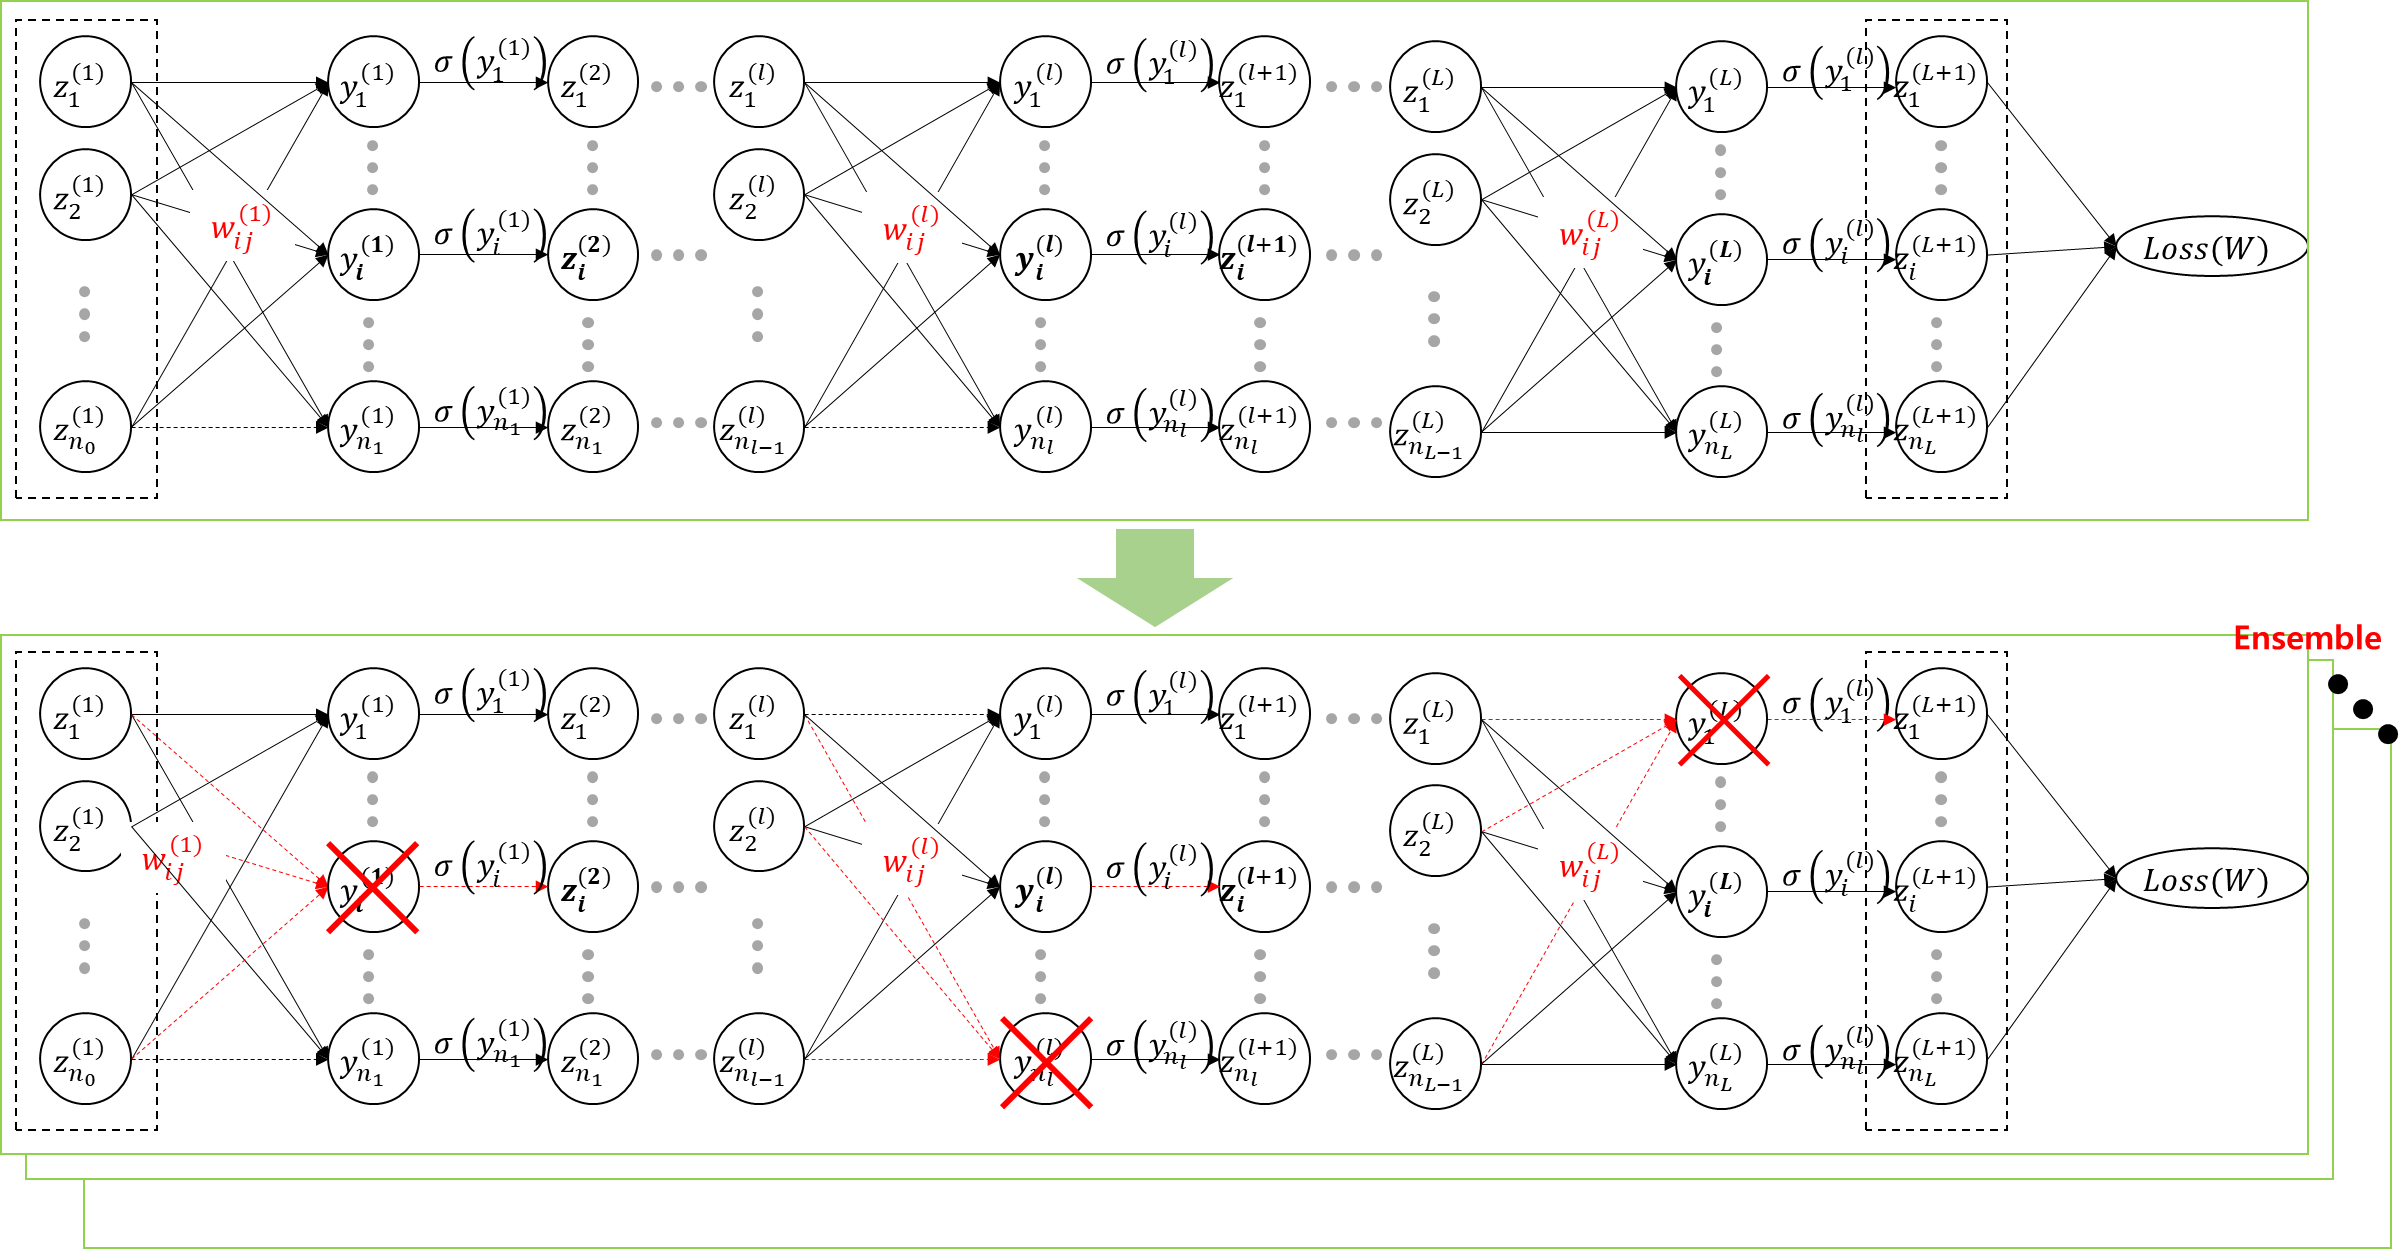

- Dropout을 이용하여 node를 random하게 제거한 Deep Neural Network들을 학습한 결과를 취합하여 사용함

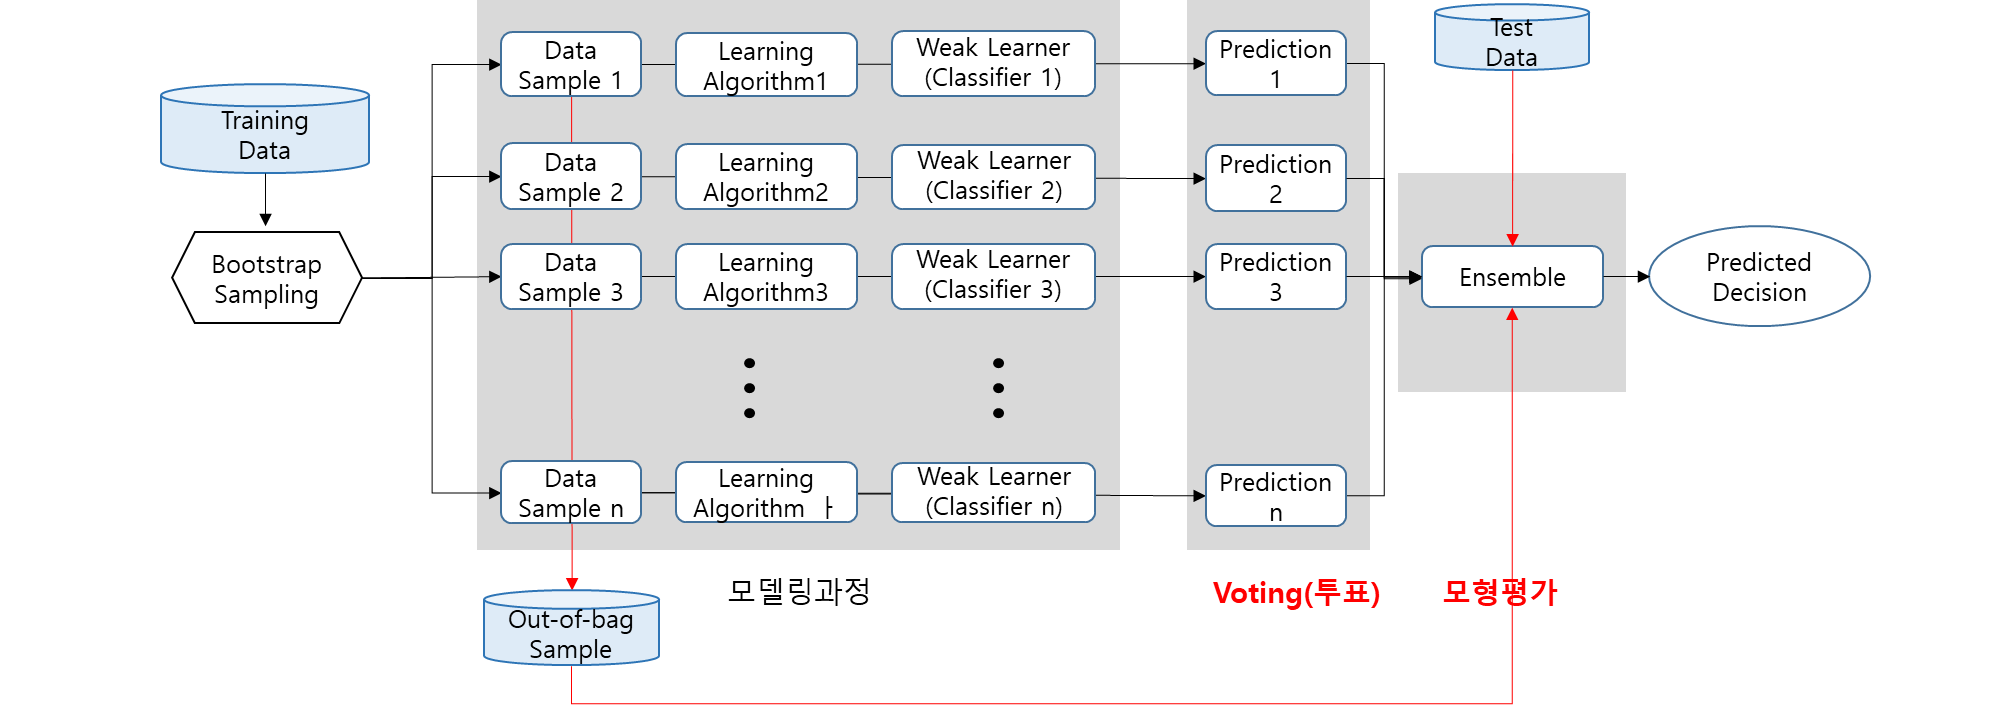